<a href="https://colab.research.google.com/github/afrusydi/statistika_optimasi/blob/main/Tugas_Besar_UAS_Statistika_Optimasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier #1
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression #Belajar juga linear regresion
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier #Belajar juga ini
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets

In [138]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [139]:
cd "/content/drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [140]:
cancer = pd.read_csv('data_cancer.csv')
cancer.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
28,852973,M,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.03057,0.03576,0.010830,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.16410,0.6110,0.63350,0.20240,0.4027,0.09876,NaN
163,8712064,B,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,0.2949,1.6560,1.955,21.55,0.011340,0.03175,0.03125,0.011350,0.01879,0.005348,13.58,28.68,87.36,553.0,0.14520,0.2338,0.16880,0.08194,0.2268,0.09082,NaN
123,865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,0.2929,0.8570,1.928,24.19,0.003818,0.01276,0.02882,0.012000,0.01910,0.002808,15.70,15.98,102.80,745.5,0.13130,0.1788,0.25600,0.12210,0.2889,0.08006,NaN
361,901041,B,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,0.2621,1.5390,2.028,20.98,0.005498,0.02045,0.01795,0.006399,0.01829,0.001956,14.20,29.20,92.94,621.2,0.11400,0.1667,0.12120,0.05614,0.2637,0.06658,NaN
549,923465,B,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.9180,3.564,33.00,0.008263,0.01870,0.01277,0.005917,0.02466,0.002977,13.03,31.45,83.90,505.6,0.12040,0.1633,0.06194,0.03264,0.3059,0.07626,NaN
339,89812,M,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.013010,0.01479,0.003118,30.67,30.73,202.40,2906.0,0.15150,0.2678,0.48190,0.20890,0.2593,0.07738,NaN
286,8912909,B,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,0.2742,1.3900,3.198,21.91,0.006719,0.05156,0.04387,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.11160,0.2813,0.23650,0.11550,0.2465,0.09981,NaN
354,901011,B,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,0.4222,0.8092,3.330,28.84,0.005541,0.03387,0.04505,0.014710,0.03102,0.004831,12.12,15.82,79.62,453.5,0.08864,0.1256,0.12010,0.03922,0.2576,0.07018,NaN
421,906564,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,0.5462,1.5110,4.795,49.45,0.009976,0.05244,0.05278,0.015800,0.02653,0.005444,16.46,18.34,114.10,809.2,0.13120,0.3635,0.32190,0.11080,0.2827,0.09208,NaN
124,865468,B,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,0.1639,1.1400,1.223,14.66,0.005919,0.03270,0.04957,0.010380,0.01208,0.004076,14.26,22.75,91.99,632.1,0.10250,0.2531,0.33080,0.08978,0.2048,0.07628,NaN


In [141]:
np.random.seed(5)

# **PCA**


In [142]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
            'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
            'symmetry_worst', 'fractal_dimension_worst']

In [143]:
x = cancer.loc[:, features].values
y = cancer.loc[:,['diagnosis']].values

In [144]:
x = StandardScaler().fit_transform(x)

In [145]:
pd.DataFrame(data = x, columns = features).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# **PCA PROJECTION to 2D**

In [146]:
pca = PCA(n_components=2)

In [147]:
principalComponents = pca.fit_transform(x)

In [148]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [149]:
principalDf.head(5)

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [150]:
df[['diagnosis']].head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [151]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


# **VISUALIZING 2D PCA**

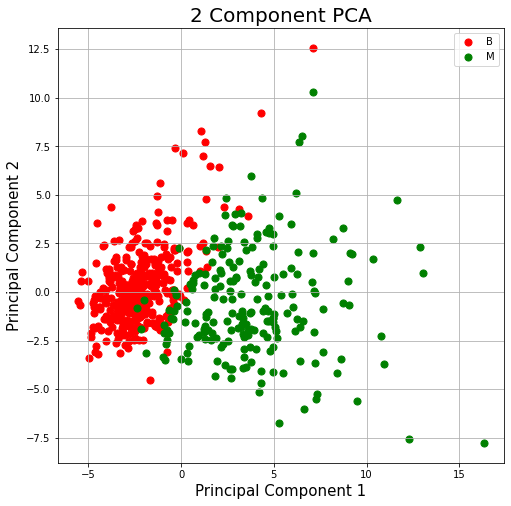

In [152]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['B', 'M']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# **LDA**

In [153]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [155]:
x = df.iloc[:, 1:].values
y = df['diagnosis'].values


In [157]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(y)

In [158]:
y = df['diagnosis'].values

In [168]:
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn.decomposition import PCA 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state= 30)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


# **NEURAL NETWORK CLASSIFICATION**

In [161]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(341, 1)
(341, 1)
(228, 1)
(228, 1)


In [162]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras.layers import Conv2D

model = Sequential(
    [
        Flatten(input_shape=()),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dropout(0.3),
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [163]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               512       
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)               

In [164]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam

In [165]:
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50


ValueError: ignored

# **Random Forest Classifier**

In [ ]:
Karena sulit menggunakan Neural Network, maka saya coba gunakan Random Forest Classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [170]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy -> ' + str(accuracy_score(y_test, y_pred)))

[[131   5]
 [  2  90]]
Accuracy -> 0.9692982456140351
